In [15]:
lista=[3,6,2,7,9]

In [16]:
listaRDD=sc.parallelize(lista)

In [17]:
listaRDD.stats()

(count: 5, mean: 5.4, stdev: 2.5768197453450252, max: 9.0, min: 2.0)

In [18]:
doble=listaRDD.map(lambda a:a*2)
doble.collect()

[6, 12, 4, 14, 18]

In [19]:
listaRDD.filter(lambda a:a>5).collect()

[6, 7, 9]

In [20]:
otro=listaRDD.filter(lambda a:a>5)\
            .map(lambda a:a*2)\
            .map(lambda a:("N:"+str(a),a))

In [21]:
otro.take(2)

[('N:12', 12), ('N:14', 14)]

In [22]:
ventas=[("moto",2000),
       ("coche",10000),
       ("coche",12000),
       ("moto",3000),
       ("moto",2000),
        ("bici",200)
       ]

In [23]:
ventasRDD=sc.parallelize(ventas)

In [24]:
ventasRDD.first()

('moto', 2000)

In [25]:
ventasRDD.collect()

[('moto', 2000),
 ('coche', 10000),
 ('coche', 12000),
 ('moto', 3000),
 ('moto', 2000),
 ('bici', 200)]

In [27]:
ventasRDD.toDF().show()

+-----+-----+
|   _1|   _2|
+-----+-----+
| moto| 2000|
|coche|10000|
|coche|12000|
| moto| 3000|
| moto| 2000|
| bici|  200|
+-----+-----+



In [46]:
ventasRDD.map(lambda a:a[1]).sum()

29200

In [47]:
#ventasRDD.map(lambda a:(a[0],a[1])).collect()

[('moto', 2000),
 ('coche', 10000),
 ('coche', 12000),
 ('moto', 3000),
 ('moto', 2000),
 ('bici', 200)]

In [32]:
res=ventasRDD.reduceByKey(lambda a,b:a+b)\
            .sortBy(lambda a:-a[1])
res.collect()

[('coche', 22000), ('moto', 7000), ('bici', 200)]

In [29]:
x=res.keys().collect()

In [55]:
y=res.values().collect()

In [56]:
import matplotlib.pyplot as grafica

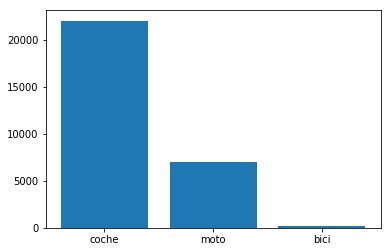

In [57]:
grafica.bar(x,y)
grafica.show()